# Importing Libraries

In [1130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Data for ML 

In [1131]:
data = pd.read_csv('Data.xlsx')

In [1132]:
data.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


# Drop any ID kind of Feature

In [1133]:
data=data.drop(['custid'],axis=1)
data.head()

,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,union,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,1,2,1,20,2,September,15,3,1,1,...,0,0,0,1,1,0,0,0,1,0
1,5,5,0,22,2,May,17,4,2,0,...,1,1,1,1,1,1,1,0,0,0
2,3,4,1,67,6,June,14,2,2,0,...,1,0,0,0,0,0,1,0,0,0
3,4,3,0,23,2,May,16,3,2,0,...,1,0,1,1,1,0,1,1,0,0
4,2,2,0,26,3,July,16,3,2,0,...,1,0,1,0,1,0,0,0,1,0


# Defining Independent and Target Feature

In [1134]:
data['totspend']=data['cardspent']+data['card2spent']
data=data.drop(['cardspent','card2spent'],axis=1)

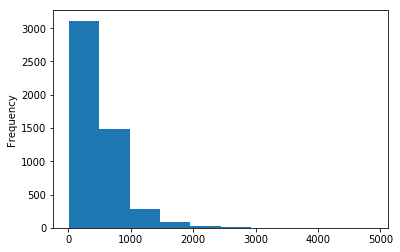

In [1135]:
data['totspend'].plot(kind='hist')

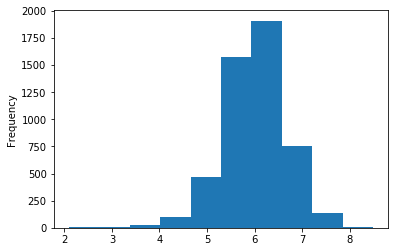

In [1136]:
data['logtotspend']=np.log(data['totspend'])
data['logtotspend'].plot(kind='hist')

In [1137]:
data=data.drop(['totspend'],axis=1)

In [1138]:
X=data.drop(['logtotspend'],axis=1)
Y=data[['logtotspend']]

In [1139]:
Y.describe()

,logtotspend
count,5000.000000
mean,6.001244
std,0.671473
min,2.093098
25%,5.621424
50%,6.026470
75%,6.422536
max,8.493116


In [1141]:
def outlier_cap(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return(x)

In [1142]:
Y=Y.apply(lambda x : outlier_cap(x))

In [1143]:
Y.describe()

,logtotspend
count,5000.000000
mean,6.004727
std,0.644973
min,4.063844
25%,5.621424
50%,6.026470
75%,6.422536
max,7.473127


# Split the data into Numerical and Categorical

In [1144]:
cat_var=['region','townsize','gender','agecat','birthmonth','edcat','jobcat','union',
'employ','empcat','retire','inccat','default','jobsat','marital','spousedcat',
'homeown','hometype','address','addresscat','cars','carown','cartype',
'carcatvalue','carbought','carbuy','commute','commutecat','commutecar','commutemotorcycle',
'commutecarpool','commutebus','commuterail','commutepublic','commutebike','commutewalk',
'commutenonmotor','telecommute','reason','polview','polparty','polcontrib','vote','card',
'cardtype','cardbenefit','cardfee','cardtenure','cardtenurecat','card2','card2type',
'card2benefit','card2fee','card2tenure','card2tenurecat','active','bfast','churn','tollfree',
'equip','callcard','wireless','multline','voice','pager','internet','callid','callwait','forward',
'confer','ebill','owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax','news',
'response_01','response_02','response_03']

In [1145]:
numerical_var=[]
for i in X.columns:
    if i not in cat_var:
        numerical_var.append(i)
print(numerical_var)

['age', 'ed', 'income', 'lninc', 'debtinc', 'creddebt', 'lncreddebt', 'othdebt', 'lnothdebt', 'spoused', 'reside', 'pets', 'pets_cats', 'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small', 'pets_saltfish', 'pets_freshfish', 'carvalue', 'commutetime', 'tenure', 'longmon', 'lnlongmon', 'longten', 'lnlongten', 'tollmon', 'lntollmon', 'tollten', 'lntollten', 'equipmon', 'lnequipmon', 'equipten', 'lnequipten', 'cardmon', 'lncardmon', 'cardten', 'lncardten', 'wiremon', 'lnwiremon', 'wireten', 'lnwireten', 'hourstv']


In [1146]:
num=X.drop(cat_var,axis=1)
char=X.drop(numerical_var,axis=1)

In [1147]:
all_columns = list(char) # Creates list of all column headers
char[all_columns] = char[all_columns].astype('object')

In [1092]:
print ("The shape of numerical dataframe :",num.shape)
print ("The shape of categorical datafrme :",char.shape)

The shape of numerical dataframe : (5000, 43)
The shape of categorical datafrme : (5000, 84)


# Check for Descriptive Statistics

In [1093]:
num.describe(percentiles=[0.01,0.05,0.25,0.50,0.75,0.95,0.99])

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4999.000000,5000.000000,4999.000000,5000.000000,...,1704.000000,5000.000000,3581.000000,4998.000000,3578.000000,5000.000000,1344.000000,5000.000000,1344.000000,5000.000000
mean,47.025600,14.543000,54.759600,3.699909,9.954160,1.857326,-0.130454,3.654460,0.696915,6.112800,...,6.747296,15.443850,2.909733,720.478391,6.426309,10.701190,3.605001,421.984610,6.808132,19.645000
std,17.770338,3.281083,55.377511,0.747072,6.399783,3.415732,1.273058,5.395172,1.128578,7.743518,...,1.199234,15.007569,0.564859,922.225527,1.172050,19.799837,0.390102,1001.003287,1.283967,5.165609
min,18.000000,6.000000,9.000000,2.197225,0.000000,0.000000,-6.597334,0.000000,-4.092107,-1.000000,...,2.489065,0.000000,1.178655,0.000000,1.558145,0.000000,2.541602,0.000000,2.541602,0.000000
1%,18.000000,8.000000,9.000000,2.197225,0.700000,0.033160,-3.401690,0.114299,-2.168241,-1.000000,...,3.169937,0.000000,1.658228,0.000000,2.484907,0.000000,2.806811,0.000000,3.039749,0.000000
5%,20.000000,9.000000,13.000000,2.564949,1.900000,0.101088,-2.291604,0.287692,-1.243483,-1.000000,...,4.251230,0.000000,1.981001,0.000000,4.094345,0.000000,2.992964,0.000000,4.114134,12.000000
25%,31.000000,12.000000,24.000000,3.178054,5.100000,0.385520,-0.952685,0.980301,-0.018987,-1.000000,...,6.171570,0.000000,2.545531,0.000000,5.857933,0.000000,3.330417,0.000000,6.158091,17.000000
50%,47.000000,14.000000,38.000000,3.637586,8.800000,0.926437,-0.076106,2.098540,0.741537,-1.000000,...,7.050556,13.750000,2.904165,425.000000,6.639876,0.000000,3.597997,0.000000,7.147185,20.000000
75%,62.000000,17.000000,67.000000,4.204693,13.600000,2.063820,0.724665,4.314780,1.462053,14.000000,...,7.649835,22.750000,3.295837,1080.000000,7.218910,20.962500,3.865193,89.962500,7.755376,23.000000
95%,76.000000,20.000000,147.000000,4.990433,22.200000,6.373010,1.852297,11.815981,2.469586,18.000000,...,8.117631,42.000000,3.839452,2455.750000,7.923257,51.305000,4.267282,2687.922500,8.310817,28.000000


# Removal of Extreme Values and Outliers from the numerical features

In [1148]:
def outlier_cap(x):
    x=x.clip(upper=x.quantile(0.99))
    x=x.clip(lower=x.quantile(0.01))
    return(x)

In [1149]:
num=num.apply(lambda x : outlier_cap(x))
num.describe(percentiles=[0.01,0.05,0.25,0.50,0.75,0.95,0.99])

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,lnequipten,cardmon,lncardmon,cardten,lncardten,wiremon,lnwiremon,wireten,lnwireten,hourstv
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4999.000000,5000.000000,4999.000000,5000.000000,...,1704.000000,5000.000000,3581.000000,4998.000000,3578.000000,5000.00000,1344.000000,5000.000000,1344.000000,5000.00000
mean,47.025600,14.544200,53.629900,3.697049,9.914120,1.758369,-0.127780,3.522506,0.698386,6.095400,...,6.747846,15.266950,2.909082,707.239096,6.429558,10.53027,3.604226,409.960020,6.808151,19.62660
std,17.770338,3.242553,46.567698,0.738495,6.241691,2.380681,1.241398,4.221760,1.104530,7.709565,...,1.190092,14.156339,0.555100,848.339901,1.146504,19.02128,0.382289,930.007398,1.273410,5.11922
min,18.000000,8.000000,9.000000,2.197225,0.700000,0.033160,-3.401690,0.114299,-2.168241,-1.000000,...,3.169937,0.000000,1.658228,0.000000,2.484907,0.00000,2.806811,0.000000,3.039749,0.00000
1%,18.000000,8.000000,9.000000,2.197225,0.700000,0.033166,-3.401599,0.114312,-2.168229,-1.000000,...,3.170180,0.000000,1.658228,0.000000,2.484907,0.00000,2.810508,0.000000,3.039749,0.00000
5%,20.000000,9.000000,13.000000,2.564949,1.900000,0.101088,-2.291604,0.287692,-1.243483,-1.000000,...,4.251230,0.000000,1.981001,0.000000,4.094345,0.00000,2.992964,0.000000,4.114134,12.00000
25%,31.000000,12.000000,24.000000,3.178054,5.100000,0.385520,-0.952685,0.980301,-0.018987,-1.000000,...,6.171570,0.000000,2.545531,0.000000,5.857933,0.00000,3.330417,0.000000,6.158091,17.00000
50%,47.000000,14.000000,38.000000,3.637586,8.800000,0.926437,-0.076106,2.098540,0.741537,-1.000000,...,7.050556,13.750000,2.904165,425.000000,6.639876,0.00000,3.597997,0.000000,7.147185,20.00000
75%,62.000000,17.000000,67.000000,4.204693,13.600000,2.063820,0.724665,4.314780,1.462053,14.000000,...,7.649835,22.750000,3.295837,1080.000000,7.218910,20.96250,3.865193,89.962500,7.755376,23.00000
95%,76.000000,20.000000,147.000000,4.990433,22.200000,6.373010,1.852297,11.815981,2.469586,18.000000,...,8.117631,42.000000,3.839452,2455.750000,7.923257,51.30500,4.267282,2687.922500,8.310817,28.00000


# Missing Value Handling - Numerical Features

In [1096]:
num.isnull().mean()

age               0.0000
ed                0.0000
income            0.0000
lninc             0.0000
debtinc           0.0000
creddebt          0.0000
lncreddebt        0.0002
othdebt           0.0000
lnothdebt         0.0002
spoused           0.0000
reside            0.0000
pets              0.0000
pets_cats         0.0000
pets_dogs         0.0000
pets_birds        0.0000
pets_reptiles     0.0000
pets_small        0.0000
pets_saltfish     0.0000
pets_freshfish    0.0000
carvalue          0.0000
commutetime       0.0004
tenure            0.0000
longmon           0.0000
lnlongmon         0.0000
longten           0.0006
lnlongten         0.0006
tollmon           0.0000
lntollmon         0.5244
tollten           0.0000
lntollten         0.5244
equipmon          0.0000
lnequipmon        0.6592
equipten          0.0000
lnequipten        0.6592
cardmon           0.0000
lncardmon         0.2838
cardten           0.0004
lncardten         0.2844
wiremon           0.0000
lnwiremon         0.7312


In [1150]:
num=num.loc[:,num.isnull().mean()<=0.25]

# Missing Value Imputation - Numerical Features

In [1151]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
num_1=pd.DataFrame(imputer.fit_transform(num),index=num.index,columns=num.columns)

# Missing Value Handling - Categorical Features

In [1099]:
char.isnull().mean()

region               0.0
townsize             0.0
gender               0.0
agecat               0.0
birthmonth           0.0
edcat                0.0
jobcat               0.0
union                0.0
employ               0.0
empcat               0.0
retire               0.0
inccat               0.0
default              0.0
jobsat               0.0
marital              0.0
spousedcat           0.0
homeown              0.0
hometype             0.0
address              0.0
addresscat           0.0
cars                 0.0
carown               0.0
cartype              0.0
carcatvalue          0.0
carbought            0.0
carbuy               0.0
commute              0.0
commutecat           0.0
commutecar           0.0
commutemotorcycle    0.0
                    ... 
card2tenurecat       0.0
active               0.0
bfast                0.0
churn                0.0
tollfree             0.0
equip                0.0
callcard             0.0
wireless             0.0
multline             0.0


# Encode Character Variables

In [1152]:
char_encode=pd.get_dummies(char,drop_first=True)
char_encode.head()

,region_2,region_3,region_4,region_5,townsize_2,townsize_3,townsize_4,townsize_5,gender_1,agecat_3,...,owncd_1,ownpda_1,ownpc_1,ownipod_1,owngame_1,ownfax_1,news_1,response_01_1,response_02_1,response_03_1
0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,1,0
1,0,0,0,1,0,0,0,1,0,0,...,1,1,1,1,1,1,1,0,0,0
2,0,1,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,1,0,1,1,1,0,1,1,0,0
4,1,0,0,0,1,0,0,0,0,1,...,1,0,1,0,1,0,0,0,1,0


# Build the complete feature set

In [1167]:
X_all=pd.concat([char_encode,num_1],axis=1,join='inner')

In [1168]:
X_all.shape

(5000, 391)

In [1169]:
from sklearn.ensemble import RandomForestRegressor
clf_rf = RandomForestRegressor(n_estimators=20)
clf_rf.fit(X_all, Y)

C:\Anaconda_Python\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(n_estimators=20)

In [1170]:
import pandas as pd
feature_importances=pd.DataFrame(clf_rf.feature_importances_,
                                 index=X_all.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_list=feature_importances.iloc[0:40]

In [1171]:
top_features=list(feature_list.index)
top_features

['income',
 'lninc',
 'carvalue',
 'card_2',
 'card_3',
 'debtinc',
 'commutetime',
 'card_4',
 'hourstv',
 'age',
 'cardmon',
 'creddebt',
 'reason_2',
 'lncreddebt',
 'lnothdebt',
 'othdebt',
 'ed',
 'pets',
 'tenure',
 'cardten',
 'lnlongmon',
 'spoused',
 'card2_2',
 'longten',
 'tollmon',
 'equipten',
 'lnlongten',
 'card_5',
 'longmon',
 'card2_3',
 'tollten',
 'equipmon',
 'gender_1',
 'pets_dogs',
 'reside',
 'pets_freshfish',
 'pets_cats',
 'wiremon',
 'wireten',
 'polparty_1']

In [1172]:
X_all=X_all[top_features]
X_all.head()

,income,lninc,carvalue,card_2,card_3,debtinc,commutetime,card_4,hourstv,age,...,tollten,equipmon,gender_1,pets_dogs,reside,pets_freshfish,pets_cats,wiremon,wireten,polparty_1
0,31.0,3.433987,14.3,0,1,11.1,22.0,0,13.0,20.0,...,161.05,29.50,1,0.0,3.0,0.0,0.0,0.00,0.00,1
1,15.0,2.708050,6.8,1,0,18.6,29.0,0,18.0,22.0,...,0.00,54.85,0,0.0,2.0,6.0,0.0,45.65,1683.55,1
2,35.0,3.555348,18.8,1,0,9.9,24.0,0,21.0,67.0,...,0.00,0.00,1,1.0,3.0,0.0,2.0,0.00,0.00,1
3,20.0,2.995732,8.7,1,0,5.7,38.0,0,26.0,23.0,...,0.00,0.00,0,0.0,5.0,0.0,0.0,0.00,0.00,0
4,23.0,3.135494,10.6,0,0,1.7,32.0,1,27.0,26.0,...,387.70,0.00,0,0.0,4.0,0.0,0.0,19.05,410.80,0


In [1180]:
from varclushi import VarClusHi
vc = VarClusHi(X_all,maxeigval2=1,maxclus=10)
vc.varclus()

In [1181]:
vc.info

,Cluster,N_Vars,Eigval1,Eigval2,VarProp
0,0,8,5.640581,1.015893,0.705073
1,1,5,2.701482,1.004414,0.540296
2,2,5,3.155947,0.879848,0.631189
3,3,6,1.955201,1.023184,0.325867
4,4,3,1.884526,0.999144,0.628175
5,5,2,1.610847,0.389153,0.805423
6,6,5,3.482664,0.619724,0.696533
7,7,2,1.340718,0.659282,0.670359
8,8,3,1.239384,0.999339,0.413128
9,9,1,1.000000,0.000000,1.000000


In [1182]:
check=vc.rsquare
check

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,age,0.418706,0.036133,0.603085
1,0,cardmon,0.373541,0.125033,0.715980
2,0,tenure,0.830687,0.110309,0.190306
3,0,cardten,0.698104,0.126383,0.345571
4,0,lnlongmon,0.866703,0.085816,0.145809
5,0,longten,0.822326,0.076365,0.192364
6,0,lnlongten,0.826967,0.094131,0.191014
7,0,longmon,0.803547,0.069347,0.211092
8,1,income,0.924813,0.364683,0.118346
9,1,lninc,0.905742,0.366739,0.148845


In [1183]:
temp=check.groupby('Cluster')['RS_Ratio'].agg(['min'])
temp.columns=['RS_Ratio']
temp

,RS_Ratio
Cluster,
0,0.145809
1,0.118346
2,0.283941
3,0.020159
4,0.065553
5,0.197219
6,0.363309
7,0.338842
8,0.387444


In [1184]:
filter=temp.merge(check,how='left',on='RS_Ratio')
filter

,RS_Ratio,Cluster,Variable,RS_Own,RS_NC
0,0.145809,0,lnlongmon,0.866703,0.085816
1,0.118346,1,income,0.924813,0.364683
2,0.283941,2,equipmon,0.719845,0.013336
3,0.020159,3,pets,0.979860,0.000963
4,0.065553,4,tollmon,0.941437,0.106640
5,0.197219,5,reside,0.805423,0.013397
6,0.363309,6,lnothdebt,0.782976,0.402647
7,0.338842,7,card_4,0.670359,0.027154
8,0.387444,8,card_2,0.618565,0.015511
9,0.000000,9,card_5,1.000000,0.008003


In [1185]:
final_features=filter['Variable']

In [1186]:
X_final=X_all[final_features]
X_final.shape 

(5000, 10)

In [1187]:
X_final.dtypes

lnlongmon    float64
income       float64
equipmon     float64
pets         float64
tollmon      float64
reside       float64
lnothdebt    float64
card_4         uint8
card_2         uint8
card_5         uint8
dtype: object

# Splitting the data into Train and Test Sets

In [1188]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, Y, test_size = 0.2, random_state = 42)

In [1189]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Average Salary in Training Data",y_train.mean())
print("Average Salary in Testing Data",y_test.mean())

Shape of Training Data (4000, 10)
Shape of Testing Data (1000, 10)
Average Salary in Training Data logtotspend    6.003231
dtype: float64
Average Salary in Testing Data logtotspend    6.01071
dtype: float64


In [1190]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()

In [1191]:
# Min_Samples_Split starting from 5% of training base
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3,4, 5, 6, 7,8], 'min_samples_split': [175,200,225,250,275,300] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = -1)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_split': 300}


In [1119]:
dtree=DecisionTreeRegressor(max_depth=5,min_samples_split=300)
dtree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_split=300)

In [1192]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=20)
rf.fit(X_train,y_train)

C:\Anaconda_Python\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(n_estimators=20)

# Evaluating the Model

# R Square Metric Between Training and Testing Sets

In [1193]:
dtree_pred_train=rf.predict(X_train)
dtree_pred_test=rf.predict(X_test)
dtree_pred_all=rf.predict(X_final)
X_final['pred_totspend']=pd.DataFrame(dtree_pred_all, index=X_final.index)

C:\Anaconda_Python\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [1194]:
from sklearn.metrics import r2_score
r_sq_train=r2_score(dtree_pred_train,y_train)
r_sq_train

0.7424592663434983

In [1195]:
from sklearn.metrics import r2_score
r_sq_test=r2_score(dtree_pred_test,y_test)
r_sq_test

-2.0758776553274427

In [1196]:
from sklearn import metrics
print('MSE for Test:',metrics.mean_squared_error(dtree_pred_test,y_test))
print('MSE for Train:',metrics.mean_squared_error(dtree_pred_train,y_train))

MSE for Test: 0.3977099047348109
MSE for Train: 0.058927465204223685


# Visualizing the Model Performance 

In [1197]:
data_eval=pd.concat([X_final,Y],axis=1,join="inner")

In [1198]:
data_eval['logtotspend'].head()

0    5.007029
1    4.350794
2    5.886021
3    5.884464
4    6.230147
Name: logtotspend, dtype: float64

# Create Buckets of Data Observations 

In [1199]:
data_eval['totspend_rank']=pd.qcut(data_eval['logtotspend'].rank(method='first').values,50,duplicates='drop').codes+1

In [1200]:
data_eval.isnull().sum()

lnlongmon        0
income           0
equipmon         0
pets             0
tollmon          0
reside           0
lnothdebt        0
card_4           0
card_2           0
card_5           0
pred_totspend    0
logtotspend      0
totspend_rank    0
dtype: int64

# Plot the Actuals versus Predicted across those buckets

C:\Anaconda_Python\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


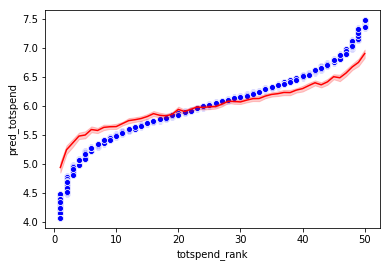

In [1201]:
ax=sns.scatterplot(x="totspend_rank",y="logtotspend",data=data_eval,color="Blue")
ax=sns.lineplot(x="totspend_rank",y="pred_totspend",data=data_eval,color="Red")

# Error Cluster Capture

In [1203]:
# Get error percentage between Predicted and Actual Values
data_eval['error']=data_eval['pred_totspend']-data_eval['logtotspend']
data_eval['error_percentage']=(data_eval['error']/data['logtotspend']).abs()
error_df=data_eval[['error_percentage']]

In [1204]:
# Build error cluster based on similar error values
from sklearn.preprocessing import KBinsDiscretizer
Bins=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='kmeans')
error_df_bin=pd.DataFrame(Bins.fit_transform(error_df),index=error_df.index, columns=error_df.columns).add_suffix('_bin')
error_df=pd.concat([error_df,error_df_bin],axis=1,join="inner")
error_df.head()

,error_percentage,error_percentage_bin
0,0.065812,2.0
1,0.154430,4.0
2,0.048459,2.0
3,0.015354,0.0
4,0.022947,1.0


In [1205]:
# Analyze the error clusters for Observation Capture
model_eval=error_df.groupby('error_percentage_bin')['error_percentage'].agg(['min','max','mean','count'])
model_eval['cum_count']=model_eval['count'].cumsum()
model_eval['cum_count_prop']=model_eval['cum_count']/max(model_eval['cum_count'])

In [1206]:
model_eval

,min,max,mean,count,cum_count,cum_count_prop
error_percentage_bin,,,,,,
0.0,0.000000,0.020169,0.009493,1895,1895,0.3790
1.0,0.020209,0.044223,0.030775,1497,3392,0.6784
2.0,0.044365,0.076955,0.057454,828,4220,0.8440
3.0,0.077108,0.123836,0.096281,481,4701,0.9402
4.0,0.124078,0.193065,0.151222,209,4910,0.9820
5.0,0.194291,0.286023,0.234934,67,4977,0.9954
6.0,0.306876,0.446111,0.368426,20,4997,0.9994
7.0,0.525568,0.525568,0.525568,1,4998,0.9996
8.0,0.645720,0.645720,0.645720,1,4999,0.9998


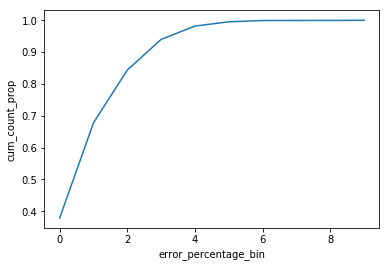

In [1207]:
# Visualize the cumulative Observation Capture by Error Clusters
ax=sns.lineplot(x=model_eval.index,y='cum_count_prop',data=model_eval)

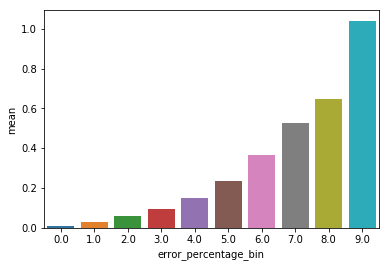

In [1208]:
ax=sns.barplot(x=model_eval.index,y='mean',data=model_eval)